In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


#Checking Dataset Structure as below

In [3]:
print(df.info())
print(df.describe())


print("Missing values:\n", df.isnull().sum())
print("\nDuplicates found:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None
             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.16

# Data cleaning as below

In [11]:
df.drop_duplicates(inplace=True)

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day'] = df['Order Date'].dt.day
df['Month Name'] = df['Order Date'].dt.strftime('%B')

df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Month,Order Year,Order Day,Month Name
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11.0,2017.0,8.0,November
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11.0,2017.0,8.0,November
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6.0,2017.0,12.0,June
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10.0,2016.0,11.0,October
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10.0,2016.0,11.0,October


Exploratory Data Analysis (EDA)

/var/folders/l3/6_1d03v13r3423dpvq4sswyw0000gn/T/ipykernel_4272/165646470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


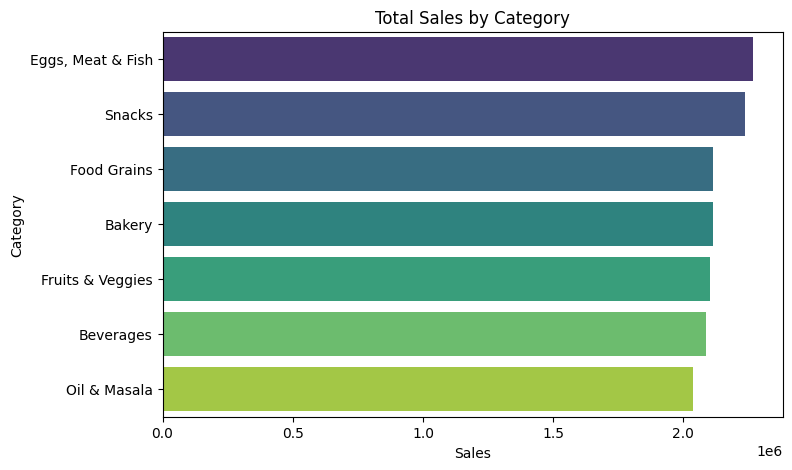

In [ ]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

#Monthly Sales Trend


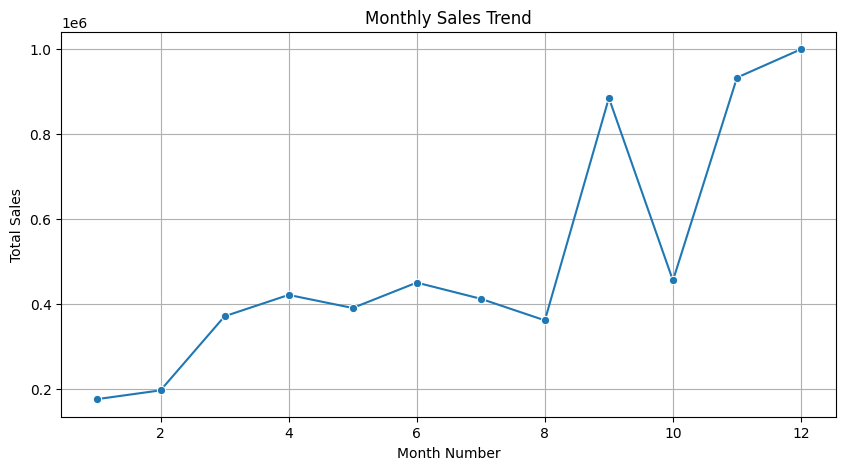

In [6]:

monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()


monthly_sales = monthly_sales.sort_values('Order Month')


plt.figure(figsize=(10, 5))
sns.lineplot(x='Order Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month Number')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#Yearly Sales Distribution

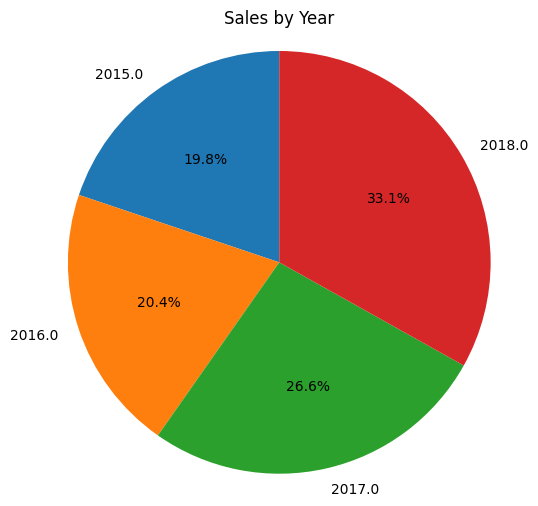

In [7]:

yearly_sales = df.groupby('Order Year')['Sales'].sum()

plt.figure(figsize=(6, 6))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Year')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()

#Sales Distribution by Region

/var/folders/l3/6_1d03v13r3423dpvq4sswyw0000gn/T/ipykernel_4272/3834381154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')


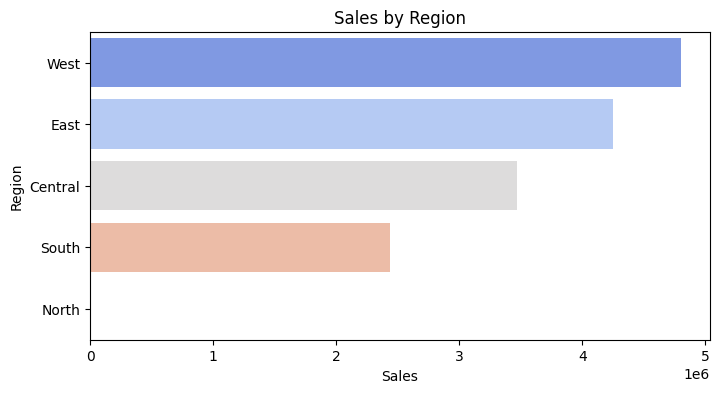

In [8]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')
plt.title('Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()

##Top 5 Cities by Sales

/var/folders/l3/6_1d03v13r3423dpvq4sswyw0000gn/T/ipykernel_4272/284317798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette='Blues_d')


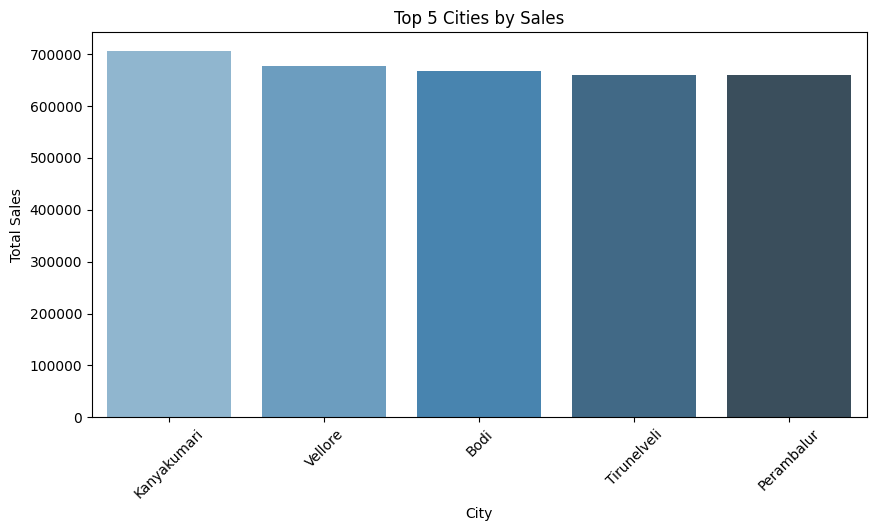

In [9]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

top_5_cities = city_sales.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette='Blues_d')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


##Correlation Heatmap

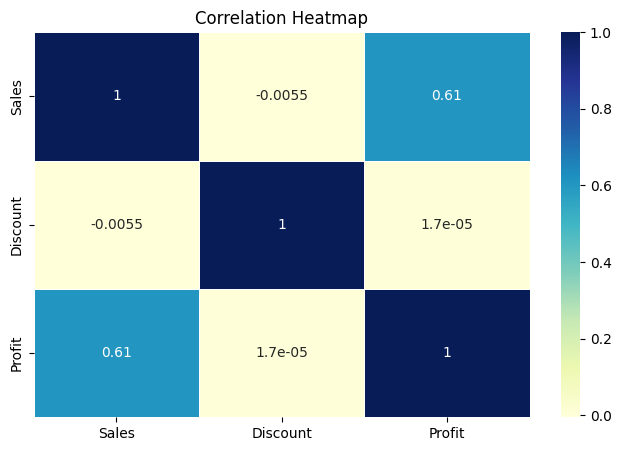

In [10]:
numeric_cols = df[['Sales', 'Discount', 'Profit']]

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()